In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd
import rubin_sim.maf as maf
from rubin_sim.maf import radar

In [2]:
def norm_df(
    df,
    runs,
    cols,
    norm_run="baseline",
    invert_cols=None,
    reverse_cols=None,
    run_label="run_name",
    mag_cols=[],
):
    """
    Normalize values in a dataframe to a given run
    Parameters
    ----------
    df : pandas.DataFrame
        The input data frame
    runs : list of str
        A list of run numes
    cols : list of str
        A list of columns in df to use
    norm_run : str
        The row to use to normalize things to
    invert_cols : list of str
        A list of column names that should be inverted (e.g., columns that
        are uncertainties and are better with a smaller value)
    reverse_cols : list of str
        Columns to reverse (e.g., magnitudes)
    run_label : str (run_name)
        The column that has run names
    mag_cols : list of str
        Columns that are in magnitudes
    """
    indices = [np.max(np.where(df.index == name)[0]) for name in runs]
    out_df = df[cols].iloc[indices].copy()
    if reverse_cols is not None:
        for colname in reverse_cols:
            out_df[colname] = -out_df[colname]
    if invert_cols is not None:
        for colname in invert_cols:
            out_df[colname] = 1.0 / out_df[colname]
    if norm_run is not None:
        indx = np.max(np.where(out_df.index == norm_run)[0])
        for col in out_df.columns:
            # maybe just check that it's not a
            if col != "run_name":
                if (col in mag_cols) | (mag_cols == "all"):
                    out_df[col] = 1.0 + (out_df[col] - out_df[col].iloc[indx])
                else:
                    out_df[col] = (
                        1.0
                        + (out_df[col] - out_df[col].iloc[indx])
                        / out_df[col].iloc[indx]
                    )
    return out_df

In [3]:
data_loaded = pd.read_hdf('summary.h5')

In [10]:
name_dict = {'parallax  best18k': 'parallax best 18k',
            'properMotion  best18k': 'proper motion best 18k',
            'MicrolensingMetric_detect tE 5_10 days Fraction detected of total (mean)': '5-10d microlensing\ndetection',
            'MicrolensingMetric_detect tE 60_90 days Fraction detected of total (mean)': '60-90d microlensing\ndetection',
            'fO  fONv MedianNvis': 'fO N vis',
            'SNNSNMetric_nSN DDF excluded Total detected': 'SNe, N',
             'SNNSNMetric_zlim DDF excluded Median': 'SNe, zlim',
            #'Total detected TDE_Quality__some_color_pnum  UserPointsSlicer': 'TDE',
            'ExgalM5_with_cuts i band non-DD year 10 3x2ptFoM': '3x2 i-band',
            'WeakLensingNvisits gri band non-DD Median': 'WL Nvis i-band',
            'PrestoKNe__scoreS  Sum': 'KNe Presto S',
            'XRBPopMetric__early_detect  Total detected': 'XRB\nearly detect',
            'Brown Dwarf, L7  VolumeSum': 'Brown Dwarf Vol',
            'Discovery_N_Chances NEO 3 pairs in 15 nights SNR=3 detection loss CumulativeCompleteness H <= 16.000000': 'NEO bright',
            'Discovery_N_Chances NEO 3 pairs in 15 nights SNR=3 detection loss CumulativeCompleteness H <= 22.000000': 'NEO faint',
            'Discovery_N_Chances TNO 3 pairs in 15 nights SNR=3 detection loss CumulativeCompleteness H <= 6.000000': 'TNO'}
invert_cols = ['parallax best 18k', 'proper motion best 18k']
mag_cols = ['5-10d microlensing\ndetection', '60-90d microlensing\ndetection', 'NEO bright', 'NEO faint', 'TNO']

data = pd.DataFrame()
for key in name_dict:
    data[name_dict[key]] = data_loaded[key]
    

mag_dict = {'CoaddM5 g Median': 'g',
 'CoaddM5 i Median': 'i',
 'CoaddM5 r Median': 'r',
 'CoaddM5 u Median': 'u',
 'CoaddM5 y Median': 'y',
 'CoaddM5 z Median': 'z'}

mag_data = pd.DataFrame()
for key in mag_dict:
    mag_data[mag_dict[key]] = data_loaded[key]
    
    

In [5]:
data

,parallax best 18k,proper motion best 18k,5-10d microlensing\ndetection,60-90d microlensing\ndetection,fO N vis,"SNe, N","SNe, zlim",3x2 i-band,WL Nvis i-band,KNe Presto S,XRB\nearly detect,Brown Dwarf Vol,NEO bright,NEO faint,TNO
supress_off_v2.99_10yrs,0.794267,0.186183,0.1596,0.4538,793.0,103577.055395,0.303822,38.817278,422.0,173.0,1884.0,166829.393946,0.9308,0.634370,0.722521
supress_on_v2.99_10yrs,0.793345,0.185786,0.1657,0.4528,791.0,109885.541234,0.297404,38.730595,421.0,163.0,1946.0,166437.978765,0.9340,0.640307,0.721724


In [12]:
mag_data

,g,i,r,u,y,z
supress_off_v2.99_10yrs,26.690296,26.270509,26.807070,25.670865,24.74528,25.541021
supress_on_v2.99_10yrs,26.691067,26.266481,26.796821,25.671016,24.74260,25.536234


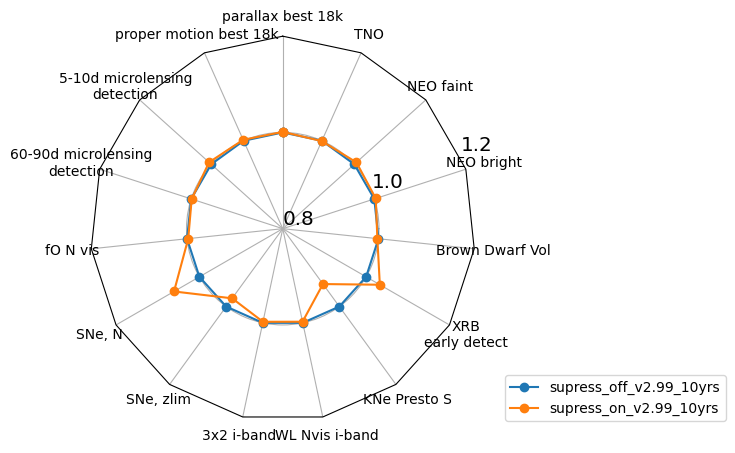

In [7]:
runs = [run for run in data.index ]
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, mag_cols = mag_cols, norm_run='supress_off_v2.99_10yrs')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(1.65, 0))

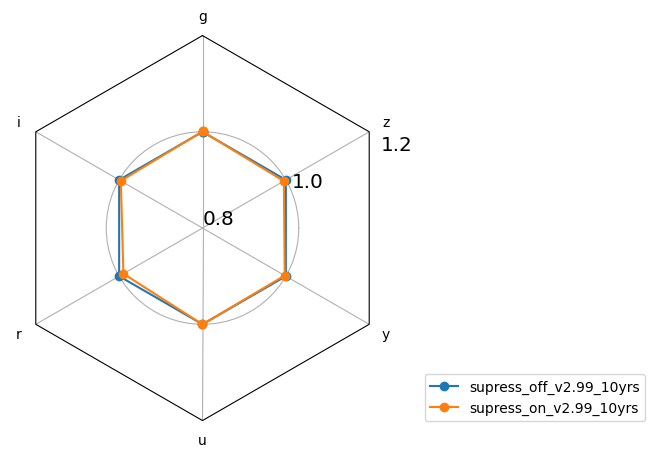

In [11]:
ndata = norm_df(mag_data, runs, cols=mag_data.columns.values.tolist(),
                mag_cols='all', norm_run='supress_off_v2.99_10yrs')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(1.65, 0))

In [13]:
data_loaded['DD:ELAISS1 NVisits all bands Median']

supress_off_v2.99_10yrs    11416.0
supress_on_v2.99_10yrs     11466.0
Name: DD:ELAISS1 NVisits all bands Median, dtype: float64

In [14]:
data_loaded['DD:COSMOS NVisits all bands Median']


supress_off_v2.99_10yrs    20622.0
supress_on_v2.99_10yrs     20739.5
Name: DD:COSMOS NVisits all bands Median, dtype: float64